In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.filters.filtertools import convolution_filter
import statsmodels.graphics.tsaplots as tsaplots
from statsmodels.tsa.seasonal import _extrapolate_trend

### Note! Change in import and function from video recording

Due to changes in packages since the recording of the video, two changes have been made in this notebook to reflect changes:

At 0:09, the video shows the import block. the line `from ts_helper import *` is not needed, and has been replaced by the line `from statsmodels.tsa.seasonal import _extrapolate_trend`

At 3:20 the `extrapolate_trend()` is used. Please use `_extrapolate_trend()` instead (notice the leading underscore).

# Load sunspots data

<Axes: xlabel='Date'>

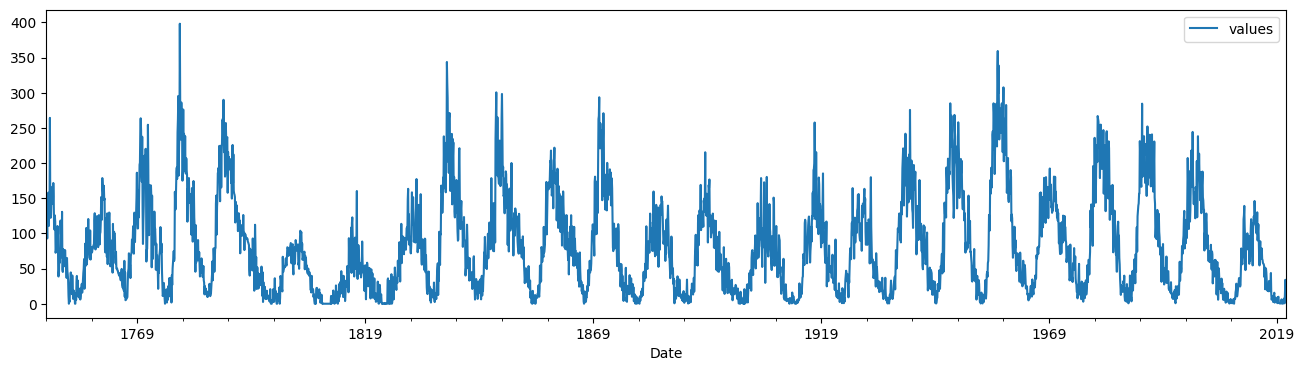

In [3]:
sunspots = pd.read_csv('data/Sunspots.csv')
sunspots = sunspots.set_index(pd.to_datetime(sunspots['Date'])) \
    .drop(columns=['Unnamed: 0','Date']) \
    .rename(columns={'Monthly Mean Total Sunspot Number':'values'})

sunspots.plot(figsize=(16,4))

# Split historical and future data
* Note that we can do this because we set the index to the timestamp

In [6]:
y_hist = sunspots.loc['1900':'1984','values']
y_future = sunspots.loc['1985':'2000','values']

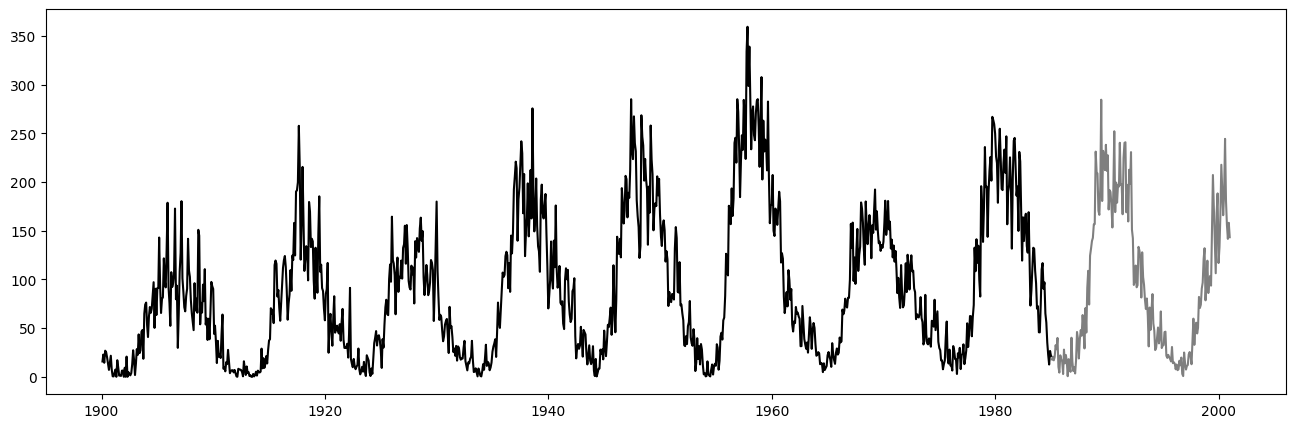

In [7]:
plt.figure(figsize=(16,5))
plt.plot(y_hist,'k')
plt.plot(y_future,'k',alpha=0.5)

# Extract the trend

In [8]:
period = 128

filt = np.ones(period+1)
filt[0] = 0.5
filt[-1] = 0.5
filt /= period

In [9]:
trend = convolution_filter(y_hist, filt)
trend = _extrapolate_trend(trend, period + 1)

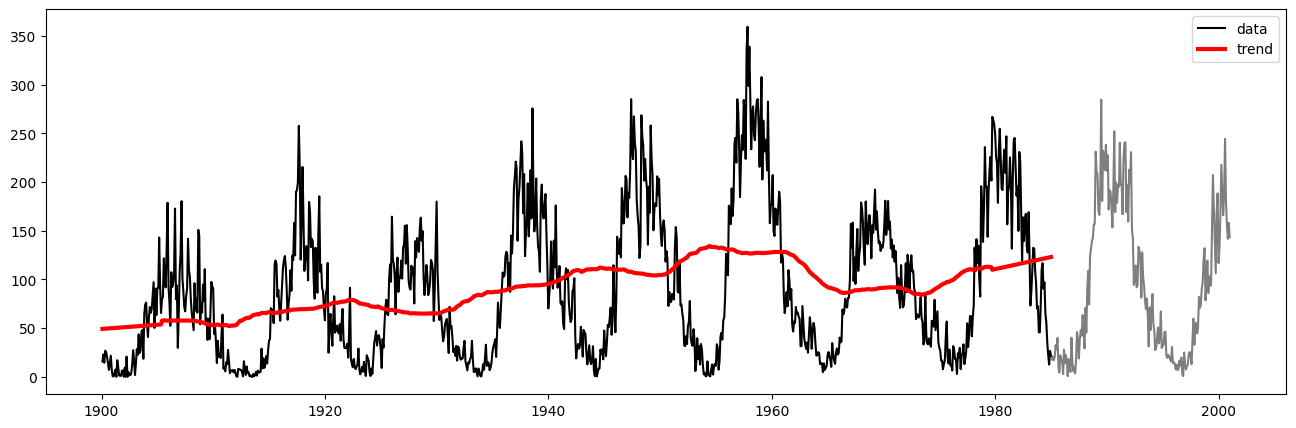

In [10]:
plt.figure(figsize=(16,5))
plt.plot(y_hist,'k',label='data')
plt.plot(trend,'r',linewidth=3,label='trend')
plt.plot(y_future,'k',alpha=0.5)
plt.legend()

# Detrended data

In [11]:
detrended = y_hist - trend
detrended = detrended.to_numpy()

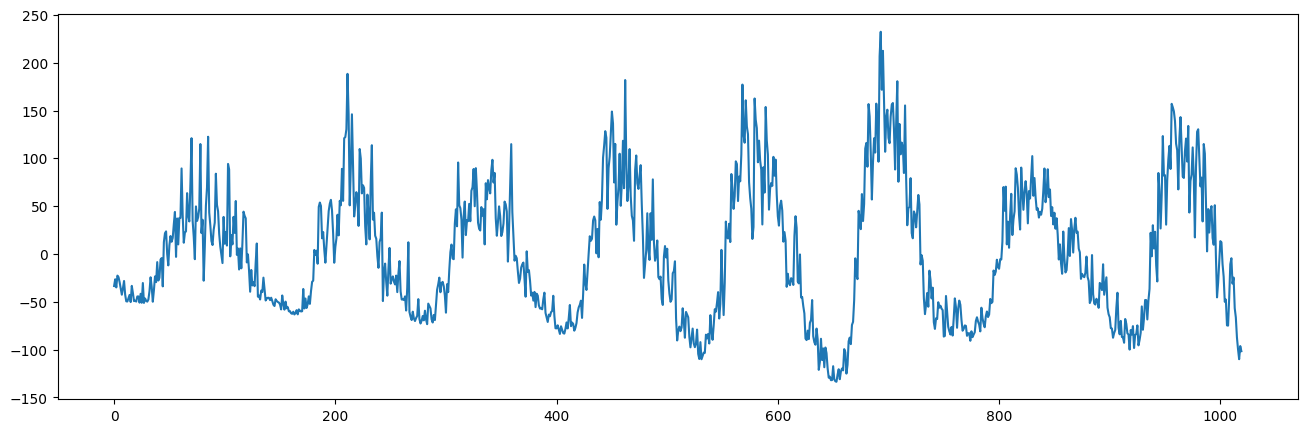

In [13]:
#The plot looks the same, but the mean is now 0
plt.figure(figsize=(16,5))
plt.plot(detrended)

# Split the historical data into seasons

In [15]:
# This is done manually here
lows_index = [20,155,284,405,529,650,775,917]
lows = y_hist.index[lows_index]
lows

DatetimeIndex(['1901-09-30', '1912-12-31', '1923-09-30', '1933-10-31',
               '1944-02-29', '1954-03-31', '1964-08-31', '1976-06-30'],
              dtype='datetime64[ns]', name='Date', freq=None)

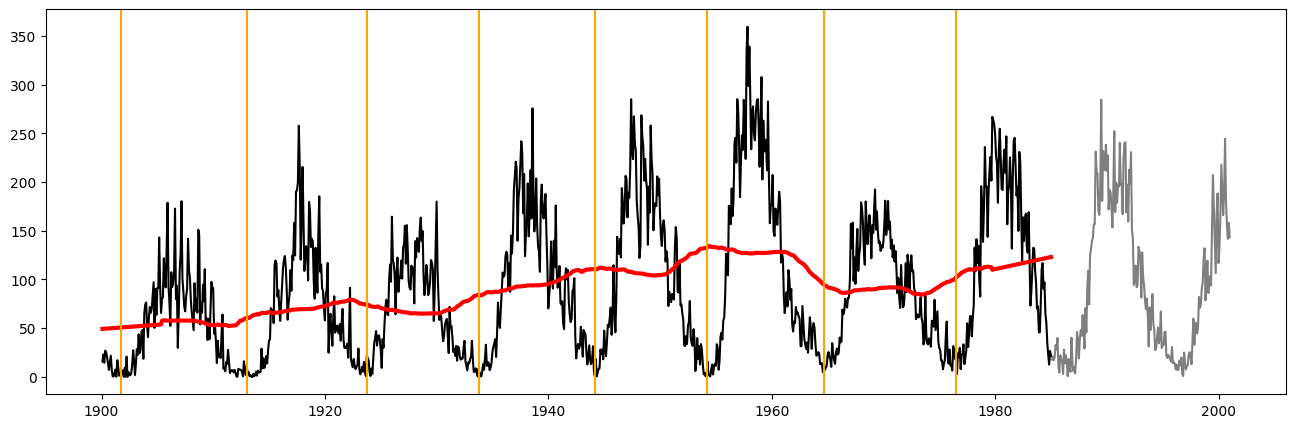

In [16]:
plt.figure(figsize=(16,5))
plt.plot(y_hist,'k')
plt.plot(y_future,'k',alpha=0.5)
plt.plot(trend,'r',linewidth=3)
for low in lows:
    plt.axvline(x=pd.to_datetime(low),color='orange')

# Divide the detrended data into seasons

In [17]:
period = int(np.round(np.mean(np.diff(lows_index))))
num_seasons = len(lows)-1    

In [18]:
seasonals = np.empty((period,num_seasons))
for p in range(num_seasons):
    s = detrended[lows_index[p]:lows_index[p]+period]
    s = 2*(s-np.min(s))/(np.max(s)-np.min(s))
    seasonals[:,p] = s
    
mean_seasonals = seasonals.mean(axis=1)

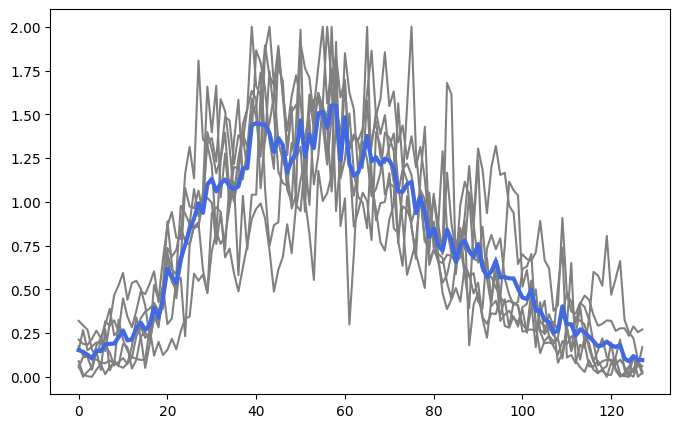

In [19]:
plt.figure(figsize=(8,5))
for p in range(num_seasons):
    plt.plot(seasonals[:,p],color=0.5*np.ones(3))
plt.plot(mean_seasonals,color='royalblue',linewidth=3)

# Smooth the seasonal data

In [20]:
filt_size = 9
filt = np.repeat(1.0 / filt_size, filt_size)

seasonals = np.empty((period,num_seasons))
for p in range(num_seasons):
    s = detrended[lows_index[p]:lows_index[p]+period]
    s = convolution_filter(s, filt)
    s = _extrapolate_trend(s, filt_size)
    s = (s-np.min(s))/(np.max(s)-np.min(s))
    seasonals[:,p] = s
    
mean_seasonals = seasonals.mean(axis=1)

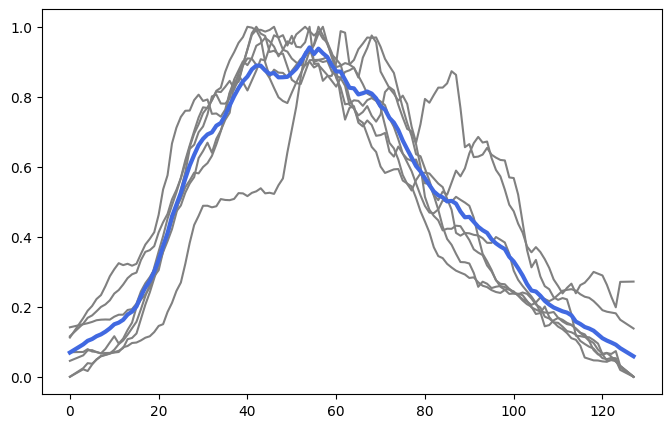

In [21]:
plt.figure(figsize=(8,5))
for p in range(num_seasons):
    plt.plot(seasonals[:,p],color=0.5*np.ones(3))
plt.plot(mean_seasonals,color='royalblue',linewidth=3)

# Remove outliers

In [22]:
seasonals = seasonals[:,[2,3,4]]
mean_seasonals = seasonals.mean(axis=1)

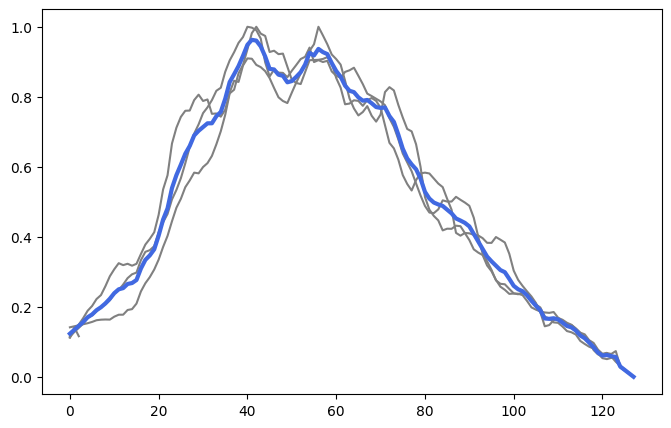

In [23]:
plt.figure(figsize=(8,5))
plt.plot(seasonals[0],color=0.5*np.ones(3),label='historical data')
plt.plot(seasonals,color=0.5*np.ones(3))
plt.plot(mean_seasonals,color='royalblue',linewidth=3)

# Build the seasonal template

In [24]:
seasonal = pd.Series(index=y_hist.index,data=0)

for low in lows_index:
    if low+period<len(seasonal):
        seasonal[low:low+period] = mean_seasonals
    else:
        seasonal[low:] = mean_seasonals[:len(seasonal)-(low+period)]
        
seasonal = seasonal / np.max(seasonal)

C:\Users\sspillane\AppData\Local\Temp\ipykernel_29856\3612591368.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.12310175 0.13426964 0.14543752 0.15660541 0.17007207 0.178075
 0.19026557 0.19870974 0.20972014 0.2230199  0.23892908 0.24989941
 0.25331279 0.26518635 0.26782506 0.27650134 0.30930999 0.33397023
 0.34680165 0.36419079 0.40352843 0.4492684  0.48114302 0.5391565
 0.57622946 0.60604067 0.63724153 0.65942328 0.68949389 0.70282561
 0.71352692 0.72416455 0.72429068 0.7445397  0.75685616 0.79443542
 0.841981   0.86440428 0.88788345 0.91697944 0.94845396 0.96270641
 0.96044702 0.94382069 0.9151787  0.87977005 0.87807639 0.86310316
 0.8598543  0.84134282 0.84485163 0.85691659 0.87026943 0.89217665
 0.92544905 0.91806277 0.93676287 0.92763038 0.92199846 0.89631401
 0.87381988 0.85735406 0.83187842 0.81721639 0.81325369 0.79830757
 0.78888662 0.79089374 0.78137497 0.7706042  0.76824275 0.76937915

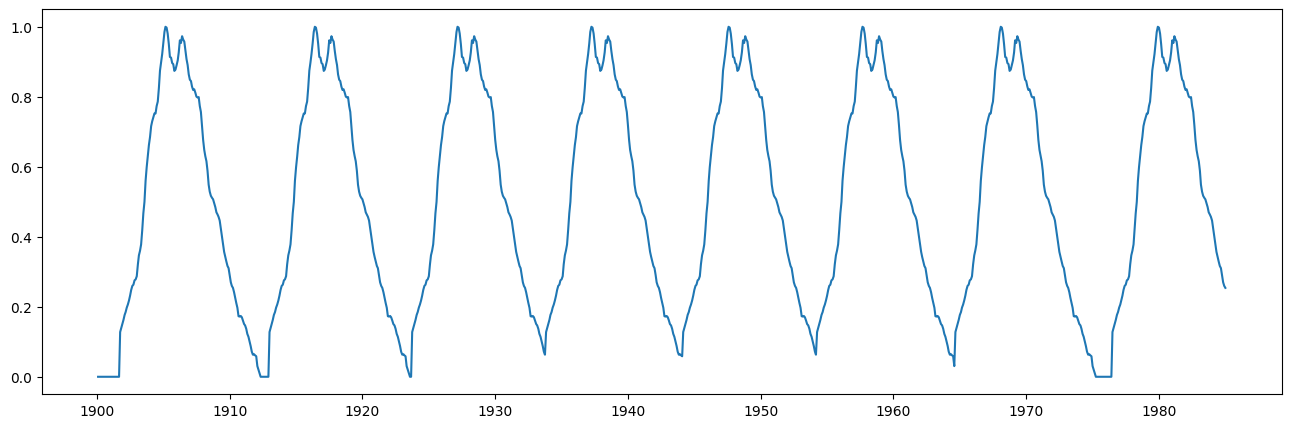

In [25]:
plt.figure(figsize=(16,5))
plt.plot(seasonal)

# Final model

In [26]:
season_and_trend = 2*trend*seasonal

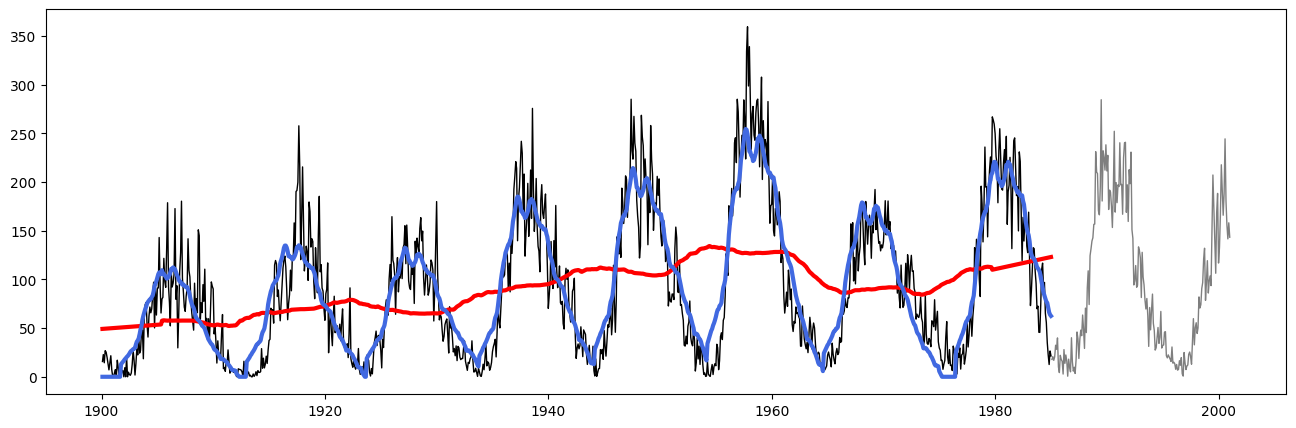

In [27]:
plt.figure(figsize=(16,5))
plt.plot(y_hist,'k',label='data',linewidth=1)
plt.plot(trend,label='trend',color='red',linewidth=3)
plt.plot(season_and_trend,label='trend & seasonal',color='royalblue',linewidth=3)
plt.plot(y_future,'k',alpha=0.5,linewidth=1)

# Model residue

In [28]:
residue = y_hist - season_and_trend

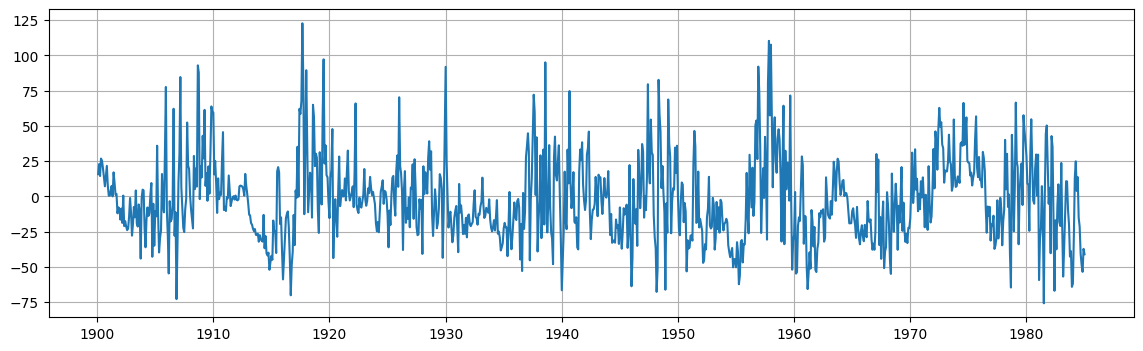

In [29]:
plt.figure(figsize=(14,4))
plt.plot(residue)
plt.grid()

## Size of the residue

In [30]:
MAEm = np.abs(residue).mean()
RMSEm = np.sqrt( np.square(residue).mean() )
MAEm, RMSEm

(22.72635908805391, 29.218041541672687)

## Stationarity of the residue

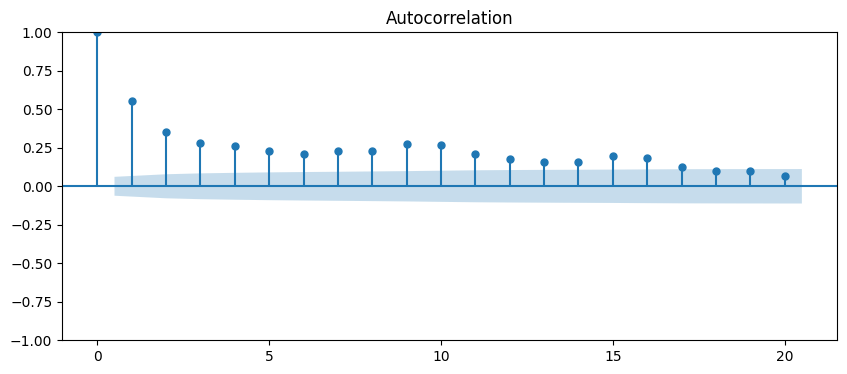

In [31]:
_, ax = plt.subplots(figsize=(10,4))
tsaplots.plot_acf(residue,lags=20, ax=ax)
plt.show()

# Forecast

In [ ]:
f = len(y_future)
f_periods = int(1 + f/period)
yhat_trend = pd.Series(index=y_future.index, data=trend[-1])

In [ ]:
yhat_seasonal = pd.Series(index=y_future.index)
for i in range(len(yhat_seasonal)):
    yhat_seasonal[i] = seasonal[-(f_periods*len(mean_seasonals)-i)]

In [35]:
yhat = 2*yhat_trend*yhat_seasonal

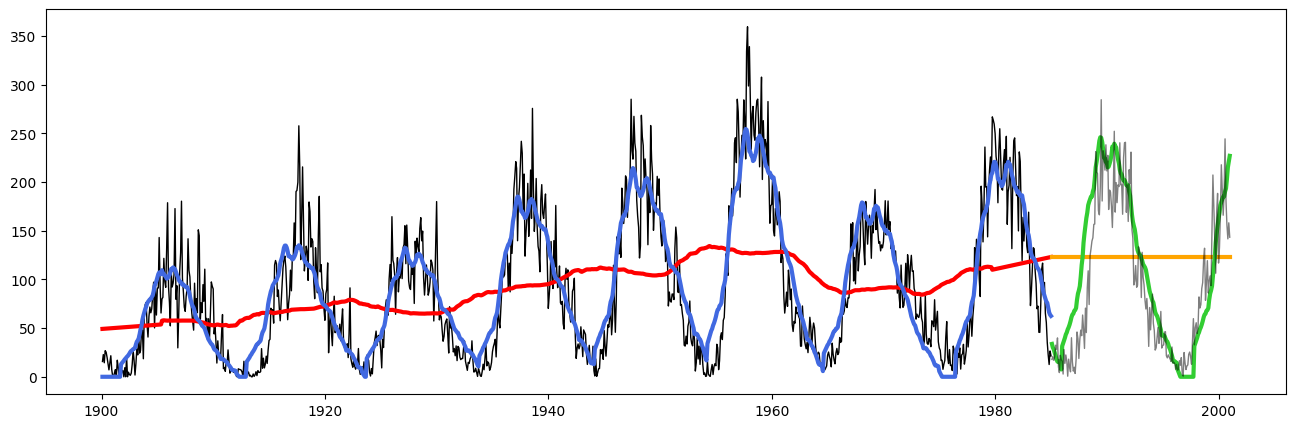

In [36]:
plt.figure(figsize=(16,5))
plt.plot(y_hist,'k',label='data',linewidth=1)
plt.plot(trend,label='trend',color='red',linewidth=3)
plt.plot(season_and_trend,label='model',color='royalblue',linewidth=3)
plt.plot(yhat_trend,label='forecast trend',color='orange',linewidth=3)
plt.plot(yhat,label='forecast',color='limegreen',linewidth=3)
plt.plot(y_future,'k',alpha=0.5,linewidth=1)

## Prediction error

In [37]:
pred_error = y_future - yhat

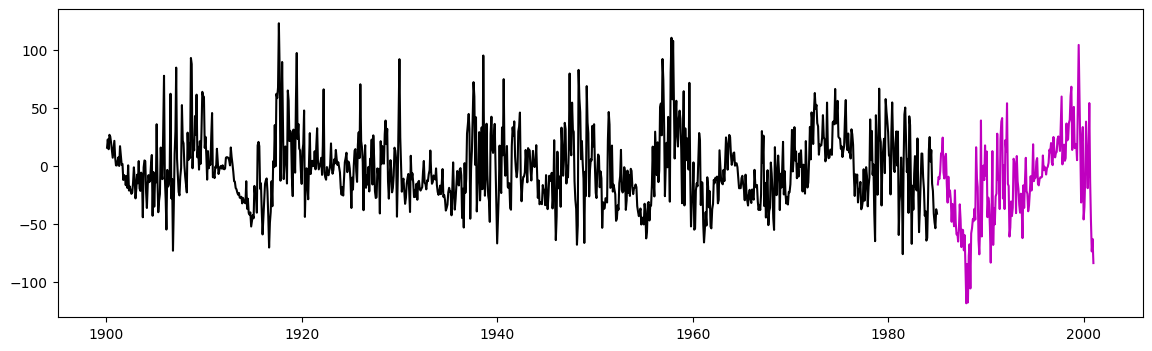

In [38]:
plt.figure(figsize=(14,4))
plt.plot(residue,'k')
plt.plot(pred_error,'m')

## Size of the prediction error

In [39]:
MAEp = np.abs(pred_error).mean()
RMSEp = np.sqrt( np.square(pred_error).mean() )
MAEp, RMSEp

(30.579767206745913, 39.01253619725412)

# save the result

In [40]:
import pickle

X = { 'history' : pd.DataFrame({'y_hist':y_hist ,'t_and_s':season_and_trend ,'ts_residue':residue}),
  'future': pd.DataFrame({'y_future':y_future , 'y_hat':yhat })
}
    
with open('decomp.pkl', 'wb') as file:
    pickle.dump(X,file)